In [1]:
import matplotlib.pyplot as plt

In [7]:
import json

def read_training_report():
    report = {}

    with open("resources/data/training-report.jsonl", "rb") as file:
        for line in file:
            parsed_line = json.loads(line)

            if not parsed_line["learning_rate"] in report:
                report[parsed_line["learning_rate"]] = {"iterations": [], "accuracies": []}
            
            report[parsed_line["learning_rate"]]["iterations"].append(parsed_line["iteration"])
            report[parsed_line["learning_rate"]]["accuracies"].append(parsed_line["accuracy"])
    
    return report

In [13]:
report = read_training_report()

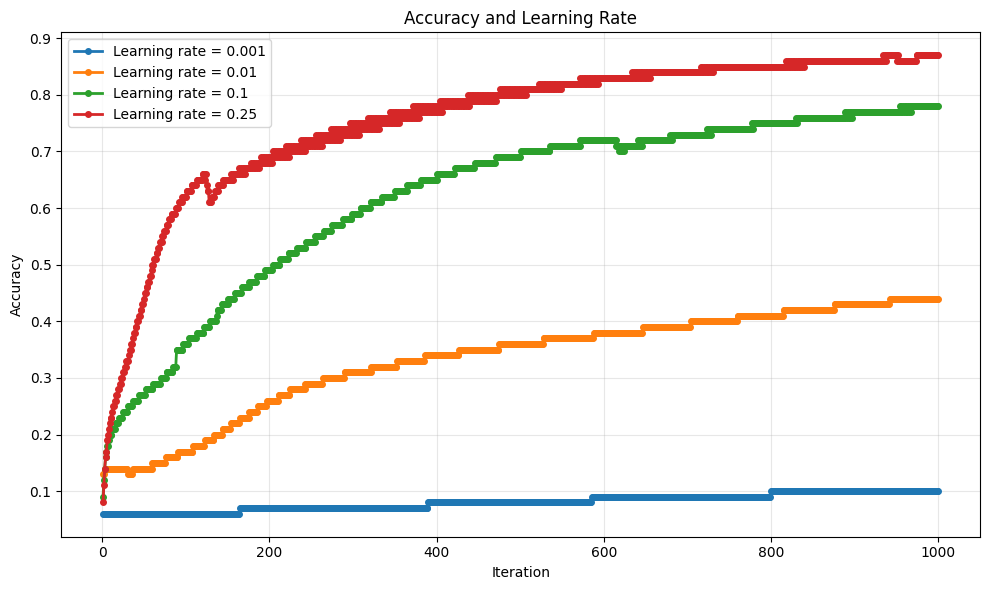

In [14]:
plt.figure(figsize=(10, 6))

for learning_rate in sorted(report.keys()):
    plt.plot(
        report[learning_rate]["iterations"],
        report[learning_rate]["accuracies"],
        marker='o',
        label=f"Learning rate = {learning_rate}",
        linewidth=2,
        markersize=4
    )

plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy and Learning Rate")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()